<a href="https://colab.research.google.com/github/Julianr98/AirBnB_clone_v4/blob/master/Ejercicios_Metodos_numericos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías a utilizar

In [1]:
import numpy as np # Operaciones algebraicas
import matplotlib.pyplot as plt # Gráficos
import math # Operaciones matemáticas

# Librería de métodos numéricos: Newton Raphson y Bissección

In [2]:
def biseccion(fname,a,b,toler,it_lim):
    # Método de Biseccion para cero de funciones no lineales en R.
    # Objetivo: Encontrar una raíz de una función
    # argumentos:
    #    fname : el nombre de la funcion f(x)
    #    a,b   : valores extremos del intervalo inicial donde esta la raíz
    #    toler : tolerancia
    #    it_lim: límite del número de iteraciones
    #    Giovanni Calderon UTS-febrero-2021
    print('Método de la bisección:')
    print('  It.     a        c         b         Y(c)\n')

    it  = 0
    Y_a = fname(a) #estamos evaluando a la funcion f(x)
    Y_b = fname(b)
    if (Y_a*Y_b > 0):
       print('Detenido porque f(a)*f(b) > 0 ')
       print({"f(a)":Y_a,"f(b)":Y_b})
       return "Unfeasible"
    else:
         while 1:
             it += 1
             c = (a+b)/2
             Y_c = fname(c)
             print('{0:3} {1:3.8f} {2:3.8f} {3:3.8f} {4:3.8f}\n'.format(it,a,c,b,Y_c))
             #print('{0:3.8f}\n'.format(c));
             if (Y_a*Y_c <= 0):
                b = c
                Y_b = Y_c
             else:
                a = c
                Y_a = Y_c
             if(abs(b-a)/2 <= toler):
                print('Se satisface la tolerancia')
                break
             if(it > it_lim):
                print('Se excedió límite de iteraciones.')
                break
    print('La raíz aproxima es: {0:3.8f}'.format(c))
    return c


def newton(fname,fprima,x0,toler,it_lim):
    # Método de Newton para cero de funciones no lineales en R.
    # Objetivo: Encontrar una raíz de una función
    # argumentos:
    #    fname : el nombre de la funcion f(x)
    #    fprima: el nombre de la derivada f'(x)
    #    x0    : estimación inicial para la raiz
    #    toler : tolerancia
    #    it_lim: límite del número de iteraciones
    #    Giovanni Calderon UTS-febrero-2021
    print('Método iterativo de Newton:\n')
    print('  It.         x            y  \n')
    x = x0
    it = 1
    xb = x
    while 1:
        yx = fname(xb)
        yd = fprima(xb)
        x = xb - yx/yd
        print('{0:3} {1:15.8f} {2:15.8f}\n'.format(it,x,yx))
        if (abs(x-xb) < toler):
           print('Se satisface la tolerancia.\n')
           break
        it = it+1
        xb = x
        if (it > it_lim):
           print('Se excedió límite de iteraciones.\n')
           break
    print('La raíz aproxima es: {0:3.8f}'.format(x))
    return x

# Punto 1

Método escogido: Newton

In [3]:
# Definir las constantes del problema  cálculo de volumen especifico la ecuación de Redlich-Kwong para el metano a una temperatura y presión específicas.
R = 0.518  # Constante universal de los gases [kJ/(kg*K)]
T_c = 191  # Temperatura crítica del metano [K]
P_c = 4580  # Presión crítica del metano [kPa]
volumen_tanque = 3  # Volumen del tanque [m^3]
T = -50 + 273.15  # Convertir temperatura de °C a Kelvin [K]
P = 65000  # Presión absoluta [kPa]

# Calcular los parámetros a y b de la ecuación de Redlich-Kwong
a = 0.427 * (R**2 * T_c**2.5) / P_c
b = 0.0866 * R * T_c / P_c

# Función de la ecuación de Redlich-Kwong
def RK_equation(v):
    return P - (R*T)/(v - b) + a/(v*(v + b)*np.sqrt(T))

# Estimar inicialmente el volumen específico v
v_initial = R * T / P  # Aproximación usando la ecuación de gas ideal

# Derivada de la ecuación de Redlich-Kwong
def RK_equation_derivative(v):
    term1 = R*T / (v - b)**2
    term2 = -a*(2*v + b) / (v**2 + v*b)**2 / np.sqrt(T)
    return term1 + term2

# Siempre en la estimación de inicial se debe usar una estimación razonable
# En este caso se puede usar una estimación inicial basada en la ecuación del gas ideal
v_newton = newton(RK_equation, RK_equation_derivative, v_initial, 1e-4, 100)

print(f"Volumen específico (Newton): {v_newton}")

Método iterativo de Newton:

  It.         x            y  

  1      0.00167064 1445895.92457612

  2      0.00138618 785343.50442346

  3     -0.00024933 490560.83627315

  4     -0.00052813 -1968955.50207190

  5     -0.00132769 -1077546.44500919

  6     -0.00049552 -1069878.93638341

  7     -0.00120818 -1125147.33964439

  8      0.00009429 -952190.59917579

  9      0.00018689 4687183.60882481

Se satisface la tolerancia.

La raíz aproxima es: 0.00018689
Volumen específico (Newton): 0.00018688970996822216


# Punto 2

In [4]:
# Datos del problema para el Punto 2.  cálculo de la profundidad del líquido en un tanque cilíndrico horizontal utilizando el método de bisección
r = 2  # radio del tanque [m]
L = 5  # longitud del tanque [m]
V = 8.5  # volumen de líquido [m^3]

# Función del volumen en función de la profundidad h
def volume(h, r, L):
    theta = np.arccos((r - h) / r)
    term1 = r**2 * theta
    term2 = (r - h) * np.sqrt(2*r*h - h**2)
    return (term1 - term2) * L

# Función que representa la ecuación a resolver
def func_to_solve(h):
    return V - volume(h, r, L)  # Igualar a 0

# Derivada de la función del volumen respecto a h
def derivative_volume(h, r, L):
    # Aproximación numérica de la derivada
    delta_h = 1e-5
    return (volume(h + delta_h, r, L) - volume(h, r, L)) / delta_h

# Método de bisección
h_biseccion = biseccion(func_to_solve, 0, 6, 1e-5, 100)

# Resultado
print(f"La profundidad del líquido h es: {h_biseccion} m")

Método de la bisección:
  It.     a        c         b         Y(c)

  1 0.00000000 3.00000000 6.00000000 -42.04815609

  2 0.00000000 1.50000000 3.00000000 -13.02109225

  3 0.00000000 0.75000000 1.50000000 0.34451350

  4 0.75000000 1.12500000 1.50000000 -5.99143355

  5 0.75000000 0.93750000 1.12500000 -2.71275990

  6 0.75000000 0.84375000 0.93750000 -1.15294784

  7 0.75000000 0.79687500 0.84375000 -0.39594103

  8 0.75000000 0.77343750 0.79687500 -0.02358103

  9 0.75000000 0.76171875 0.77343750 0.16100762

 10 0.76171875 0.76757812 0.77343750 0.06884761

 11 0.76757812 0.77050781 0.77343750 0.02266674

 12 0.77050781 0.77197266 0.77343750 -0.00044880

 13 0.77050781 0.77124023 0.77197266 0.01111106

 14 0.77124023 0.77160645 0.77197266 0.00533165

 15 0.77160645 0.77178955 0.77197266 0.00244156

 16 0.77178955 0.77188110 0.77197266 0.00099641

 17 0.77188110 0.77192688 0.77197266 0.00027381

 18 0.77192688 0.77194977 0.77197266 -0.00008749

 19 0.77192688 0.77193832 0.77194977 0

<ipython-input-4-d5b248bc2217>:8: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos((r - h) / r)
<ipython-input-4-d5b248bc2217>:10: RuntimeWarning: invalid value encountered in sqrt
  term2 = (r - h) * np.sqrt(2*r*h - h**2)


# Punto 3

In [5]:
# Datos del problema para el tubo liso.calcula el factor de fricción y la caída de presión en un tubo liso y en un tubo rugoso utilizando la ecuación de Colebrook para el cálculo de la fricción en flujos turbulentos en tuberías.
rho = 1.23  # densidad [kg/m³]
mu = 1.79e-5  # viscosidad dinámica [N·s/m²]
D = 0.005  # diámetro [m]
V = 40  # velocidad [m/s]
epsilon_liso = 0.0015 / 1000  # rugosidad [m]
L = 0.2  # longitud del tubo [m]
Re = rho * V * D / mu  # número de Reynolds

# Función de Colebrook adaptada
def colebrook(f, epsilon, D, Re):
    return 1 / np.sqrt(f) + 2.0 * np.log10(epsilon / (3.7 * D) + 2.51 / (Re * np.sqrt(f)))

# Aproximación numérica de la derivada de Colebrook respecto a f
def derivative_colebrook(f, epsilon, D, Re):
    delta_f = 1e-6
    return (colebrook(f + delta_f, epsilon, D, Re) - colebrook(f, epsilon, D, Re)) / delta_f

# Método de bisección para el tubo liso
f_liso_biseccion = biseccion(lambda f: colebrook(f, epsilon_liso, D, Re), 0.008, 0.1, 1e-5, 100)

# Cálculo de la caída de presión para el tubo liso
delta_p_liso_biseccion = f_liso_biseccion * (L / D) * (rho * V**2) / 2

print()
print(f"Factor de fricción para el tubo liso (bisección): {f_liso_biseccion:.5f}")
print(f"Caída de presión en el tubo liso (bisección): {delta_p_liso_biseccion:.2f} Pa")
print()


# Datos del problema para el tubo rugoso
epsilon_rugoso = 0.045 / 1000  # rugosidad [m]

# Método de bisección para el tubo rugoso
f_rugoso_biseccion = biseccion(lambda f: colebrook(f, epsilon_rugoso, D, Re), 0.008, 0.1, 1e-6, 100)

# Cálculo de la caída de presión para el tubo rugoso
delta_p_rugoso_biseccion = f_rugoso_biseccion * (L / D) * (rho * V**2) / 2

print()
print(f"Factor de fricción para el tubo rugoso (bisección): {f_rugoso_biseccion:.5f}")
print(f"Caída de presión en el tubo rugoso (bisección): {delta_p_rugoso_biseccion:.2f} Pa")
print()


Método de la bisección:
  It.     a        c         b         Y(c)

  1 0.00800000 0.05400000 0.10000000 -1.82061612

  2 0.00800000 0.03100000 0.05400000 -0.22319012

  3 0.00800000 0.01950000 0.03100000 1.44654102

  4 0.01950000 0.02525000 0.03100000 0.47329851

  5 0.02525000 0.02812500 0.03100000 0.09931243

  6 0.02812500 0.02956250 0.03100000 -0.06759925

  7 0.02812500 0.02884375 0.02956250 0.01435508

  8 0.02884375 0.02920313 0.02956250 -0.02698609

  9 0.02884375 0.02902344 0.02920313 -0.00640788

 10 0.02884375 0.02893359 0.02902344 0.00395033

 11 0.02893359 0.02897852 0.02902344 -0.00123457

 12 0.02893359 0.02895605 0.02897852 0.00135642

 13 0.02895605 0.02896729 0.02897852 0.00006056

Se satisface la tolerancia
La raíz aproxima es: 0.02896729

Factor de fricción para el tubo liso (bisección): 0.02897
Caída de presión en el tubo liso (bisección): 1140.15 Pa

Método de la bisección:
  It.     a        c         b         Y(c)

  1 0.00800000 0.05400000 0.10000000 -0.681

# Punto 4

In [6]:
# Datos del problema.calcula la velocidad de sedimentación de una partícula en un fluido utilizando la ecuación de Newton para la velocidad de sedimentación y ajustes para manejar números de Reynolds cercanos a cero.
d = 0.0002  # diámetro de la partícula [m]
rho_p = 2650  # densidad de la partícula [kg/m³]
rho_f = 1000  # densidad del fluido [kg/m³]
g = 9.81  # aceleración debido a la gravedad [m/s²]
mu = 0.001  # viscosidad del fluido [Pa·s]


# Función calcular_Cd para manejar Re cercano a cero
def calcular_Cd(Re):
    if Re == 0:
        return float('inf')  # Retornar un valor grande para evitar la división por cero
    return 24/Re + 6/(1 + np.sqrt(Re)) + 0.4

# Función de velocidad de Newton para utilizar calcular_Cd_ajustado
def velocidad_Newton(d, rho_p, rho_f, g, mu, v):
    Re = (rho_f * v * d) / mu
    Cd = calcular_Cd(Re)
    return np.sqrt((4 * d * (rho_p - rho_f) * g) / (3 * Cd * rho_f))

# Función objetivo ajustada para utilizar velocidad_Newton_ajustada
def funcion_objetivo(v):
    return v - velocidad_Newton(d, rho_p, rho_f, g, mu, v)

# Derivada numérica de la función objetivo ajustada
def derivada_funcion_objetivo(v):
    delta_v = 1e-6
    return (funcion_objetivo(v + delta_v) - funcion_objetivo(v)) / delta_v


# Reintentar el método de bisección y Newton con ajustes
v_biseccion = biseccion(funcion_objetivo, 0.0001, 0.1, 1e-6, 100)

print(f"La velocidad de sedimentación es: {v_biseccion} m/s")

Método de la bisección:
  It.     a        c         b         Y(c)

  1 0.00010000 0.05005000 0.10000000 0.01813822

  2 0.00010000 0.02507500 0.05005000 0.00030982

  3 0.00010000 0.01258750 0.02507500 -0.00618154

  4 0.01258750 0.01883125 0.02507500 -0.00329998

  5 0.01883125 0.02195313 0.02507500 -0.00156412

  6 0.02195313 0.02351406 0.02507500 -0.00064253

  7 0.02351406 0.02429453 0.02507500 -0.00017000

  8 0.02429453 0.02468477 0.02507500 0.00006902

  9 0.02429453 0.02448965 0.02468477 -0.00005071

 10 0.02448965 0.02458721 0.02468477 0.00000910

 11 0.02448965 0.02453843 0.02458721 -0.00002082

 12 0.02453843 0.02456282 0.02458721 -0.00000586

 13 0.02456282 0.02457501 0.02458721 0.00000162

 14 0.02456282 0.02456891 0.02457501 -0.00000212

 15 0.02456891 0.02457196 0.02457501 -0.00000025

 16 0.02457196 0.02457349 0.02457501 0.00000068

Se satisface la tolerancia
La raíz aproxima es: 0.02457349
La velocidad de sedimentación es: 0.024573487854003907 m/s


# Punto 5

In [7]:
initial_guess = 1.0  # Definición adecuada de una estimación inicial.Este código utiliza el método de Newton para encontrar la distancia a la cual la concentración de oxígeno en un cuerpo de agua alcanza los 5 mg/L.

# Definición de la función de concentración de oxígeno y la función objetivo
def oxygen_concentration(x):
    return 10 - 20 * (np.exp(-0.2 * x) - np.exp(-0.75 * x))

def root_function(x):
    return oxygen_concentration(x) - 5


# Derivada de la función de concentración de oxígeno para uso en el método de Newton
def derivative_oxygen_concentration(x):
    return 4 * np.exp(-0.2 * x) - 15 * np.exp(-0.75 * x)

# Método de Newton para encontrar la distancia a la concentración de 5 mg/L
x_distance_5mg_newton = newton(root_function, derivative_oxygen_concentration, initial_guess, 1e-6, 100)

print(f"Distancia a la concentración de 5 mg/L (Newton): {x_distance_5mg_newton:.3f} km")

Método iterativo de Newton:

  It.         x            y  

  1      0.49422755     -1.92728401

  2      0.59641430      0.68777181

  3      0.60233655      0.03577013

  4      0.60235546      0.00011350

  5      0.60235546      0.00000000

Se satisface la tolerancia.

La raíz aproxima es: 0.60235546
Distancia a la concentración de 5 mg/L (Newton): 0.602 km


# Puinto 6

Método iterativo de Newton:

  It.         x            y  

  1      3.69337148     -2.23818123

  2      3.98189621      0.45551923

  3      4.00156321      0.02751951

  4      4.00163407      0.00009844

  5      4.00163407      0.00000000

Se satisface la tolerancia.

La raíz aproxima es: 4.00163407
El tiempo necesario para que la concentración de bacterias se reduzca a 15 mg/L es: 4.00 horas


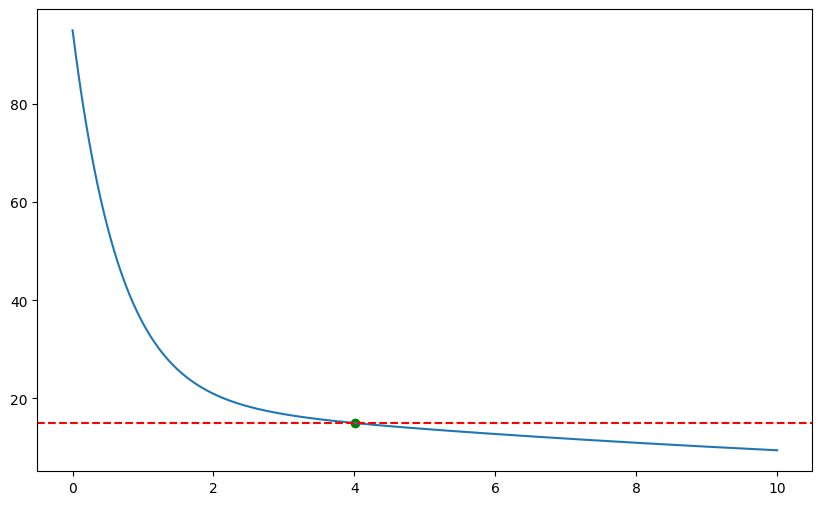

In [8]:
# Definir la función de concentración de bacterias en función del tiempo.Este código calcula el tiempo necesario para que la concentración de bacterias en un medio acuoso alcance los 15 mg/L, utilizando el método de Newton
def bacteria_concentration(t):
    return 75 * np.exp(-1.5 * t) + 20 * np.exp(-0.075 * t)

# Derivada de la función para calcular la concentración de bacterias
def derivative_bacteria_concentration(t):
    return -75 * 1.5 * np.exp(-1.5 * t) - 20 * 0.075 * np.exp(-0.075 * t)

# Paso 1: Generar una serie de valores de tiempo (t) para el gráfico
time_values = np.linspace(0, 10, 400)  # Asumimos un rango de 0 a 10 para visualizar

# Función objetivo ajustada para cuando queremos que la concentración sea 15
def func_to_solve(t):
    return bacteria_concentration(t) - 15

# Aplicar el método de Newton para encontrar el valor de t
initial_guess_newton = 6  # Valor inicial
time_to_reach_15_newton = newton(func_to_solve, derivative_bacteria_concentration, initial_guess_newton, 1e-6, 100)

# Resultado
print(f"El tiempo necesario para que la concentración de bacterias se reduzca a 15 mg/L es: {time_to_reach_15_newton:.2f} horas")

# Mostrar el gráfico
plt.figure(figsize=(10, 6))
plt.plot(time_values, bacteria_concentration(time_values), label='Concentración de Bacterias')
plt.axhline(y=15, color='r', linestyle='--', label='Concentración objetivo (15)')
plt.scatter(time_to_reach_15_newton, 15, color='g', label=f'Tiempo alcanzado: {time_to_reach_15_newton:.2f} horas')

In [ ]:
print(0.000001)

1e-06


# Punto 7

In [9]:
# Definir los parámetros del problema y la función objetivo. Este código busca encontrar la tensión mínima necesaria en un cable para que tenga una altura de 15 unidades en una distancia horizontal de 50 unidades, dado que el cable está sometido a una carga uniforme por unidad de longitud de 10 unidades.

w = 10  # Carga uniforme por unidad de longitud del cable
y = 15  # Altura deseada del cable en x = 50
x = 50  # Distancia horizontal dada
TA_lower_limit = 1  # Límite inferior de TA
TA_upper_limit = 10000  # Límite superior de TA

def objective_function(TA):
    if TA <= 0:
        return float('inf')  # Evitar valores de TA no positivos
    else:
        # Calculamos la altura del cable para el valor actual de TA y x = 50
        height = (TA / w) * np.cosh(w / TA * x) - (TA / w)
        # Devolvemos la diferencia entre la altura calculada y la deseada
        return height - y

# Reaplicar el método de bisección para encontrar el valor de TA
TA_solution = biseccion(objective_function, TA_lower_limit, TA_upper_limit, 1e-6, 100)

Método de la bisección:
  It.     a        c         b         Y(c)

  1 1.00000000 5000.50000000 10000.00000000 -12.49816657

  2 1.00000000 2500.75000000 5000.50000000 -9.98482567

  3 1.00000000 1250.87500000 2500.75000000 -4.87323073

  4 1.00000000 625.93750000 1250.87500000 6.05477080

  5 625.93750000 938.40625000 1250.87500000 -1.36141116

  6 625.93750000 782.17187500 938.40625000 1.53281387

  7 782.17187500 860.28906250 938.40625000 -0.05635528

  8 782.17187500 821.23046875 860.28906250 0.69710082

  9 821.23046875 840.75976562 860.28906250 0.31088388

 10 840.75976562 850.52441406 860.28906250 0.12498230

 11 850.52441406 855.40673828 860.28906250 0.03375378

 12 855.40673828 857.84790039 860.28906250 -0.01143936

 13 855.40673828 856.62731934 857.84790039 0.01112239

 14 856.62731934 857.23760986 857.84790039 -0.00016717

 15 856.62731934 856.93246460 857.23760986 0.00547544

 16 856.93246460 857.08503723 857.23760986 0.00265359

 17 857.08503723 857.16132355 857.23760986

# Punto 8

In [10]:
# Capacidades caloríficas de los fluidos como funciones de la temperatura (T).Este código calcula la temperatura final de dos fluidos (A y B) al mezclarse, utilizando el método de bisección para encontrar el equilibrio de entalpía entre los fluidos. Aquí está la explicación de cada parte
def cp_A(T):
    return 3.381 + 1.804e-2 * T - 4.300e-6 * T**2

def cp_B(T):
    return 8.592 + 1.290e-2 * T - 4.078e-5 * T**2

# Establecer las temperaturas iniciales de los fluidos A y B en Kelvin
T_A1 = 400 + 273.15  # Temperatura inicial del fluido A en K
T_B1 = 700 + 273.15  # Temperatura inicial del fluido B en K

# Aproximación de la integral utilizando sumas discretas (método del trapecio)
def approximate_integral(cp_function, T_start, T_end, num_steps=1000):
    T_range = np.linspace(T_start, T_end, num_steps)
    cp_values = cp_function(T_range)
    integral_approximation = np.trapz(cp_values, T_range)
    return integral_approximation

# Definir la función para el balance de entalpía entre los fluidos
def enthalpy_difference_approx(T_f):
    delta_H_A = approximate_integral(cp_A, T_A1, T_f)
    delta_H_B = approximate_integral(cp_B, T_B1, T_f)
    return 2 * delta_H_A - delta_H_B  # Ajustado para balancear la entalpía entre los fluidos

# Utilizar el método de bisección para encontrar la temperatura final (T_f)
T_initial_guess_low = min(T_A1, T_B1)  # Temperatura inicial baja para la bisección
T_initial_guess_high = max(T_A1, T_B1)  # Temperatura inicial alta para la bisección

T_final_approx = biseccion(enthalpy_difference_approx, T_initial_guess_low, T_initial_guess_high, 1e-6, 100)

# Convertir la temperatura final aproximada a grados Celsius
T_final_Celsius_approx = T_final_approx - 273.15

print(f"La temperatura final de los fluidos en el mezclador (aproximación) es: {T_final_Celsius_approx:.2f} °C")

Método de la bisección:
  It.     a        c         b         Y(c)

  1 673.15000000 823.15000000 973.15000000 2419.64890671

  2 673.15000000 748.15000000 823.15000000 -299.80803072

  3 748.15000000 785.65000000 823.15000000 1008.06888891

  4 748.15000000 766.90000000 785.65000000 341.37966596

  5 748.15000000 757.52500000 766.90000000 17.62464235

  6 748.15000000 752.83750000 757.52500000 -141.87867356

  7 752.83750000 755.18125000 757.52500000 -62.32417475

  8 755.18125000 756.35312500 757.52500000 -22.39910778

  9 756.35312500 756.93906250 757.52500000 -2.39957458

 10 756.93906250 757.23203125 757.52500000 7.60944761

 11 756.93906250 757.08554687 757.23203125 2.60416505

 12 756.93906250 757.01230469 757.08554687 0.10210238

 13 756.93906250 756.97568359 757.01230469 -1.14878431

 14 756.97568359 756.99399414 757.01230469 -0.52335302

 15 756.99399414 757.00314941 757.01230469 -0.21062833

 16 757.00314941 757.00772705 757.01230469 -0.05426373

 17 757.00772705 757.010015

# Punto 9

In [11]:
#Este código recalcula la temperatura correspondiente a un calor específico de 1.2 kJ/(kgK) para el aire seco, utilizando el método de bisección. Aquí está la explicación de cada parte
T_lower_limit = 1000  # Límite inferior razonable para la temperatura en Kelvin
T_upper_limit = 5000  # Límite superior razonable para la temperatura en Kelvin

# Redefinición de la función que representa el calor específico a presión cero del aire seco
def cp_polynomial(T):
    return (-0.99403 + 1.671e-4 * T + 9.7215e-8 * T**2 -
            9.5838e-11 * T**3 + 1.9520e-14 * T**4)

# Redefinición de la función para la cual queremos encontrar la raíz (cp = 1.2)
def cp_difference(T):
    return cp_polynomial(T) - 1.2

# Reaplicar el método de bisección para encontrar la temperatura que corresponde a un calor específico de 1.2 kJ/(kgK)
T_final_biseccion = biseccion(cp_difference, T_lower_limit, T_upper_limit, 1e-6, 100)

print(f"La temperatura que corresponde a un calor específico de 1.2 kJ/(kgK) es: {T_final_biseccion:.2f} K")

Método de la bisección:
  It.     a        c         b         Y(c)

  1 1000.00000000 3000.00000000 5000.00000000 -1.82430100

  2 3000.00000000 4000.00000000 5000.00000000 -1.10670200

  3 4000.00000000 4500.00000000 5000.00000000 -0.20229400

  4 4500.00000000 4750.00000000 5000.00000000 0.45894653

  5 4500.00000000 4625.00000000 4750.00000000 0.10843505

  6 4500.00000000 4562.50000000 4625.00000000 -0.05170887

  7 4562.50000000 4593.75000000 4625.00000000 0.02714434

  8 4562.50000000 4578.12500000 4593.75000000 -0.01258395

  9 4578.12500000 4585.93750000 4593.75000000 0.00720440

 10 4578.12500000 4582.03125000 4585.93750000 -0.00270867

 11 4582.03125000 4583.98437500 4585.93750000 0.00224313

 12 4582.03125000 4583.00781250 4583.98437500 -0.00023395

 13 4583.00781250 4583.49609375 4583.98437500 0.00100429

 14 4583.00781250 4583.25195312 4583.49609375 0.00038510

 15 4583.00781250 4583.12988281 4583.25195312 0.00007555

 16 4583.00781250 4583.06884766 4583.12988281 -0.00007

# Punto 10

In [12]:
# Razón de compresión y otros parámetros proporcionados.Este código calcula la eficiencia politrópica eficiencia de un compresor de acuerdo con la ecuación politrópica de compresión de gases
R_c = 3.0  # Razón de compresión
z = 1.2  # Compresibilidad del gas
R = 8.314  # Constante de los gases ideal en J/(mol·K)
T1 = 300 + 273.15  # Temperatura del gas en la entrada del compresor en K
MW = 28.97  # Peso molecular del gas (aire) en g/mol

# Al asumir que la energía del compresor es igual a zRT1/MW
# permite que estos términos se cancelen de ambos lados de la ecuación original
# al resolver para n, no necesitamos estos valores

# Función a resolver
def f(n):
    if n == 1:  # Evitar la división por cero
        return float('inf') # Número decimal
    return (n / (n - 1)) * (R_c**((n - 1) / n) - 1) - 1

# Aproximación numérica de la derivada de f(n)
def derivative_f(n, delta_n=1e-6):
    return (f(n + delta_n) - f(n)) / delta_n

# Aplicar el método de Newton para encontrar la eficiencia politrópica n
n_politropica_newton = newton(f, lambda n: derivative_f(n), 1.1, 1e-6, 100)

# Mostrar el resultado
print(f"La eficiencia politrópica n del compresor es aproximadamente: {n_politropica_newton:.4f}")

Método iterativo de Newton:

  It.         x            y  

  1      0.80866540      0.15534654

  2      0.85055132     -0.03256519

  3      0.85180044     -0.00091712

  4      0.85180150     -0.00000078

  5      0.85180150     -0.00000000

Se satisface la tolerancia.

La raíz aproxima es: 0.85180150
La eficiencia politrópica n del compresor es aproximadamente: 0.8518
